In [2]:
from visualization import process_stpt_image, process_imc_image

import matplotlib.pyplot as plt
from torchvision import transforms
import torch

## Plot a sample of STPT and IMC image

In [8]:
stpt = process_stpt_image('../data/STPT/S001_Z00.tif').permute(2,0,1)

imc = process_imc_image('../data/IMC/SECTION_01/143Nd_Vimentin.tif')
stpt = transforms.Resize(imc.shape[0])(stpt).permute(1,2,0)

In [9]:
imc = imc[16:18704, 16:18704]
print(stpt.shape)
print(imc.shape)

torch.Size([18720, 18720, 4])
torch.Size([18688, 18688])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


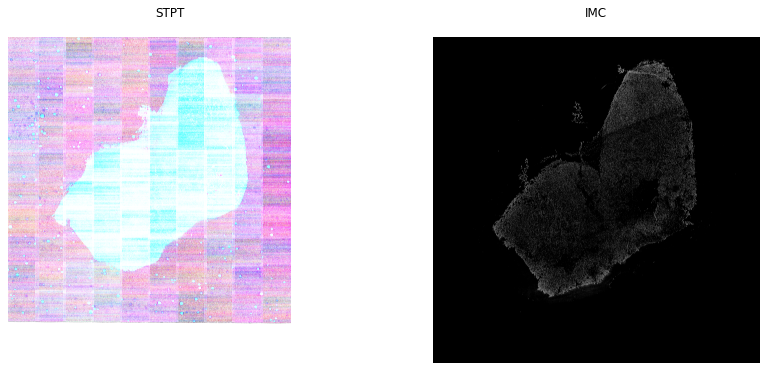

In [10]:
f, (axarr1, axarr2) = plt.subplots(1,2, figsize=(14,6))
axarr1.axis("off")
axarr2.axis("off")
axarr1.set_title('STPT', pad=20)
axarr2.set_title('IMC', pad=20)
axarr1.imshow(stpt.numpy(), cmap='gray')
axarr2.imshow(imc.numpy(), cmap='gray')

f.savefig('../figures/sample_imc_stpt.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


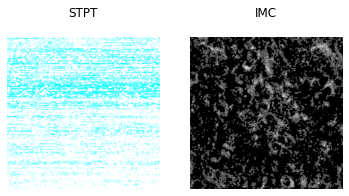

In [11]:
phys_sec = '10'   # choose which physical section to reconstruct
chunk = '40_21'  # choose which chunk to extract

# load images
stpt_piece = torch.load('../data/train/STPT/{0}/{1}.pt'.format(phys_sec.zfill(2), chunk))

imc_piece = torch.load('../data/train/IMC/{0}/{1}.pt'.format(phys_sec.zfill(2), chunk))

f, (axarr1, axarr2) = plt.subplots(1,2)
axarr1.axis("off")
axarr2.axis("off")
axarr1.set_title('STPT', pad=20)
axarr2.set_title('IMC', pad=20)
axarr1.imshow(stpt_piece[:4].permute(1,2,0).numpy(), cmap='gray')
axarr2.imshow(imc_piece.permute(1,2,0)[:,:,5].numpy(), cmap='gray')

f.savefig('../figures/sample_imc_stpt_crop.png')

In [1]:
from utils.visualization import display_img
from skimage import io, exposure
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import time
import torch

In [2]:
unet_output = open('checkpoints/unet_output.txt')
contents = unet_output.read()
lines = contents.splitlines()

In [3]:
import re

losses = []
for line in lines[1:]:
    try:
        found = re.search('\tLoss (.+?) ', line).group(1)
        losses.append(float(found))
    except AttributeError:
        pass

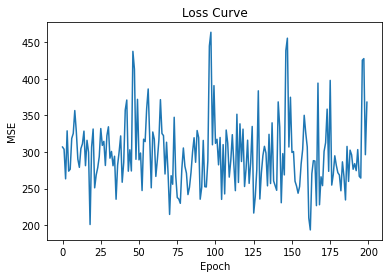

In [9]:
plt.plot(losses)
plt.locator_params(axis='y', nbins=10)
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.savefig('../figures/unet_loss_curve.png')